In [1]:
from pathlib import Path

from deepPavlovEval import Evaluator
from models.bert import BERtEmbedder

[nltk_data] Downloading package punkt to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/not_a_robot/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [12]:
evaluator = Evaluator()

2018-12-28 19:53:50.29 WARNING in 'deeppavlov.dataset_readers.basic_classification_reader'['basic_classification_reader'] at line 97: Cannot find /home/not_a_robot/Documents/deepPavlovEval/data/Rusentiment/valid.csv file


In [2]:
BASE = Path('/data/pretrained/bert/multilingual_L-12_H-768_A-12')

bert_embedder = BERtEmbedder(vocab_file=BASE/'vocab.txt',
                             bert_config_file=BASE/'bert_config.json',
                             init_checkpoint=BASE/'bert_model.ckpt',
                             mean=True, pooling_strategy='CLS')

Optionally load previous results:

In [3]:
_ = evaluator.load_results('results/results.jsonl')

In [9]:
%%time
bert_embedder.pooling_strategy = 'mean'
evaluator.evaluate(bert_embedder,
                   model_name='BERT (mean)',
                   input_type='string')

/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/not_a_robot/Documents/deepPavlovEval/deepPavlovEval/utils.py:131: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(x_train, y_train)
/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 5min 5s, sys: 1min 1s, total: 6min 7s
Wall time: 5min 48s


/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [10]:
%%time
bert_embedder.pooling_strategy = 'CLS'
evaluator.evaluate(bert_embedder,
                   model_name='BERT (CLS tag)',
                   input_type='string')

/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/not_a_robot/Documents/deepPavlovEval/deepPavlovEval/utils.py:131: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  try:
/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 5min 3s, sys: 58.8 s, total: 6min 2s
Wall time: 5min 43s


/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [11]:
BASE = Path('/data/pretrained/bert/bert_rusentiment')

bert_embedder = BERtEmbedder(vocab_file=BASE/'vocab.txt',
                             bert_config_file=BASE/'bert_config.json',
                             init_checkpoint=BASE/'model.ckpt-100000',
                             mean=True, pooling_strategy='CLS')

In [12]:
%%time
bert_embedder.pooling_strategy = 'CLS'
evaluator.evaluate(bert_embedder, model_name='BERT (CLS tag) fit on domain data', input_type='string', tasks=['rusentiment'])

/home/not_a_robot/Documents/deepPavlovEval/deepPavlovEval/utils.py:131: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  try:
/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1min 34s, sys: 12.9 s, total: 1min 47s
Wall time: 1min 43s


/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [13]:
%%time
bert_embedder.pooling_strategy = 'mean'
evaluator.evaluate(bert_embedder, model_name='BERT (mean) [fit on domain data]', input_type='string', tasks=['rusentiment'])

/home/not_a_robot/Documents/deepPavlovEval/deepPavlovEval/utils.py:131: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  try:
/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1min 33s, sys: 12.7 s, total: 1min 46s
Wall time: 1min 42s


/home/not_a_robot/.local/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
BASE = Path('/data/pretrained/bert/bert_paraphraser/')

bert_embedder = BERtEmbedder(vocab_file=BASE/'vocab.txt',
                             bert_config_file=BASE/'bert_config.json',
                             init_checkpoint=BASE/'model.ckpt-100000',
                             mean=True, pooling_strategy='CLS')

In [15]:
%%time
bert_embedder.pooling_strategy = 'CLS'
evaluator.evaluate(bert_embedder, model_name='BERT (CLS tag) [fit on domain data]', input_type='string', tasks=['paraphraser'])

CPU times: user 1min 25s, sys: 23.6 s, total: 1min 48s
Wall time: 1min 52s


In [16]:
%%time
bert_embedder.pooling_strategy = 'mean'
evaluator.evaluate(bert_embedder, model_name='BERT (mean) [fit on domain data]', input_type='string', tasks=['paraphraser'])

CPU times: user 1min 24s, sys: 23.7 s, total: 1min 48s
Wall time: 1min 40s


In [18]:
evaluator.save_results()

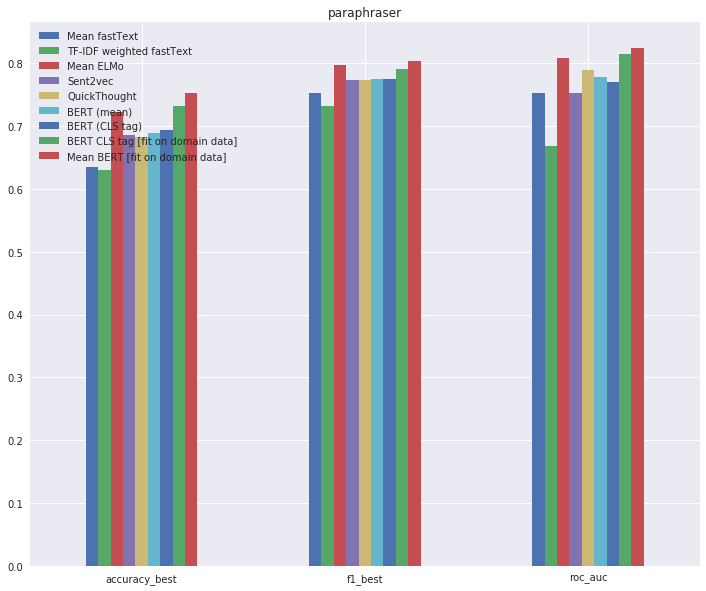

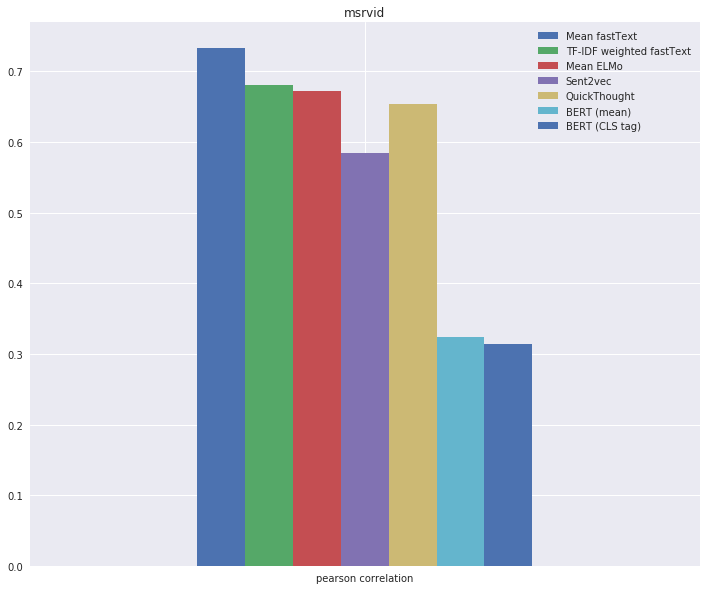

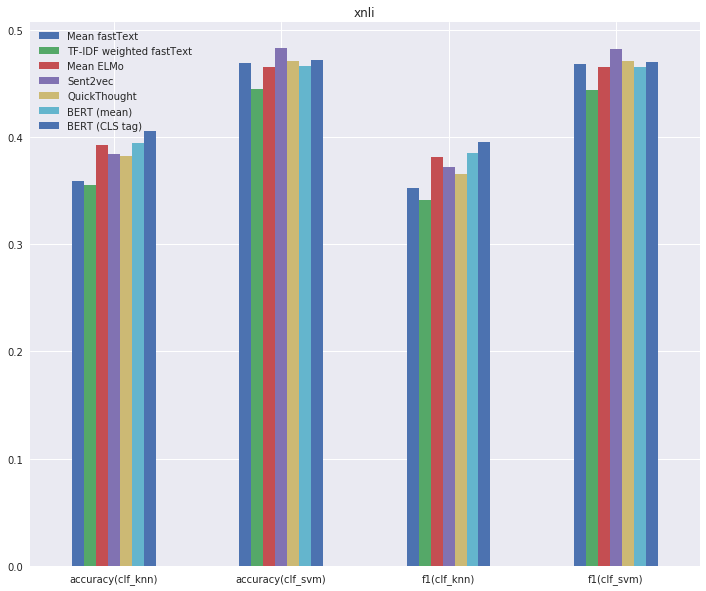

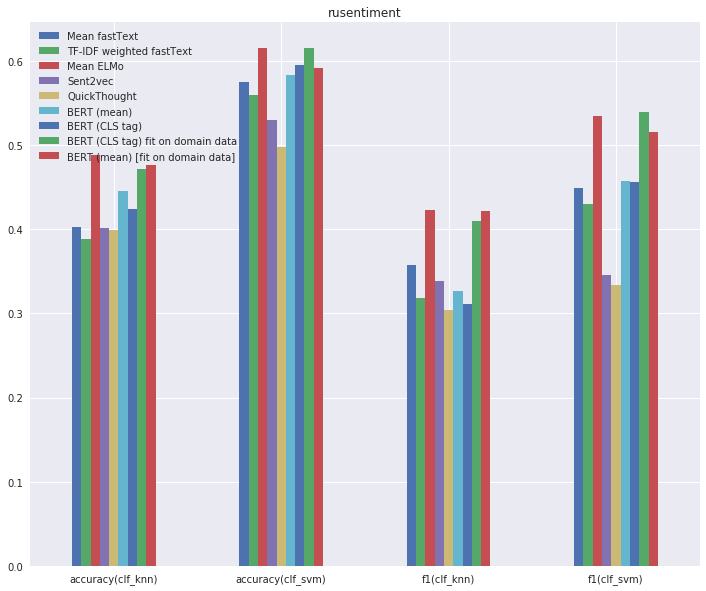

In [17]:
evaluator.plot_results(show=True, save=False)

In [17]:
def remap_naming(x):
    if x == 'Mean fastText':
        return 'fastText (mean)'
    if x == 'TF-IDF weighted fastText':
        return 'fastText (tfidf-weighted mean)'
    if x == 'Mean ELMo':
        return 'ELMo (mean)'
    if x == 'BERT CLS tag':
        return 'BERT (CLS tag)'
    if x == 'Mean BERT':
        return 'BERT (mean)'
    if x == 'BERT CLS tag [fit on domain data]':
        return 'BERT (CLS tag) [fit on domain data]'
    if x == 'Mean BERT [fit on domain data]':
        return 'BERT (mean) [fit on domain data]'
    return x

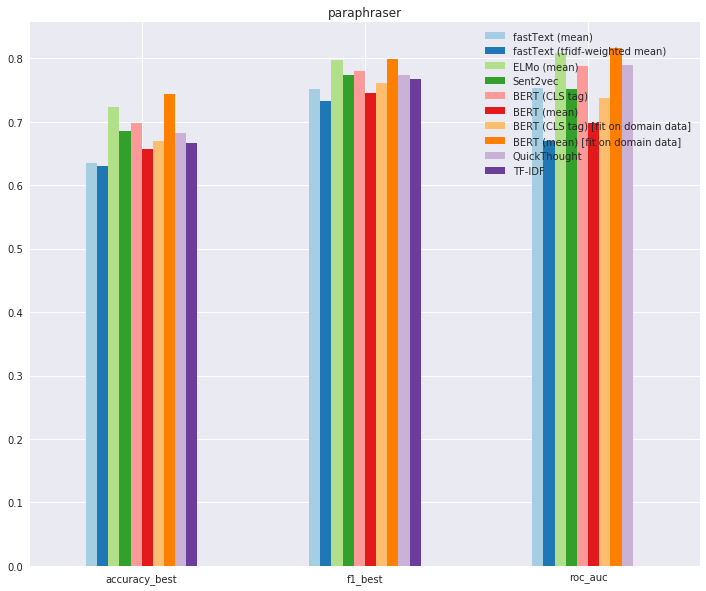

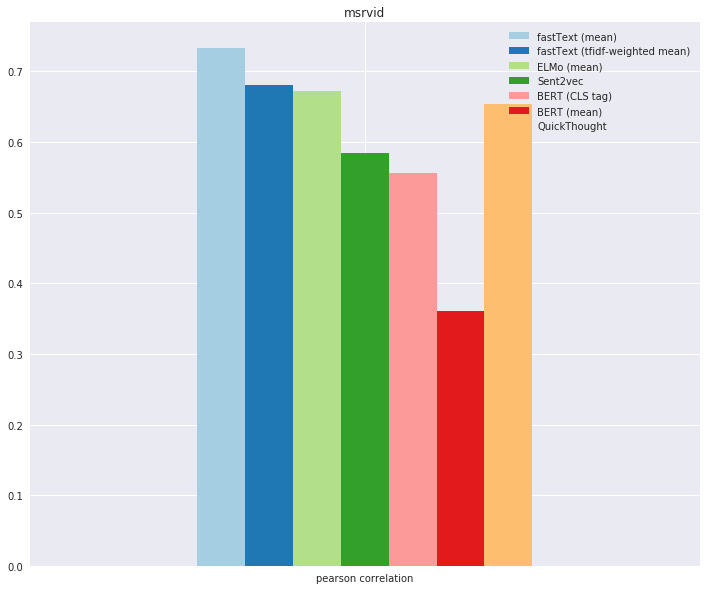

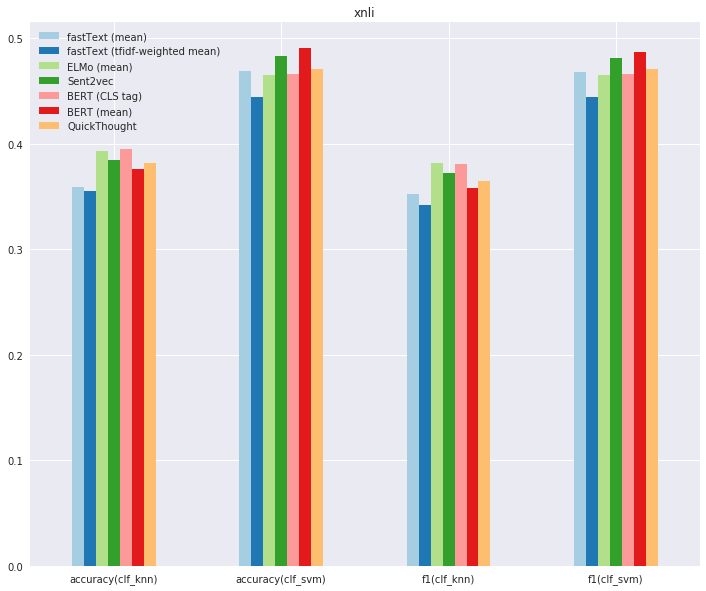

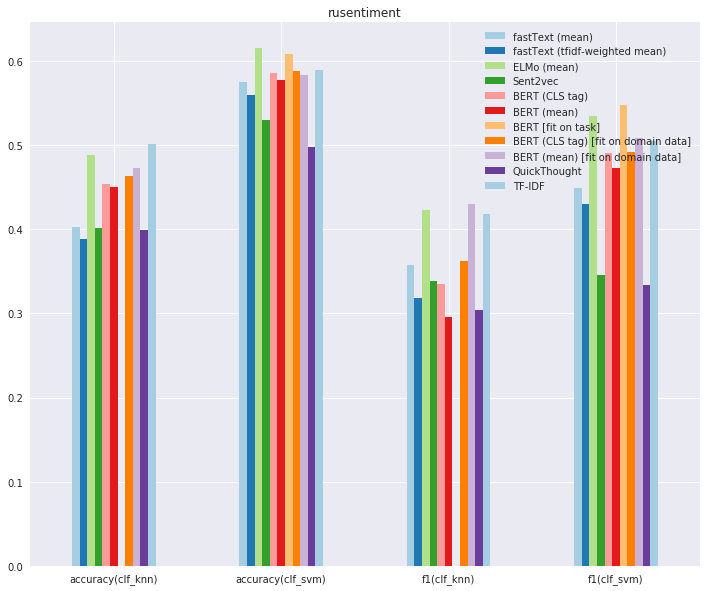

In [20]:
evaluator.plot_results(show=True, save=False, color=sns.color_palette("Paired", n_colors=10))